In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score

# 데이터 불러오기 (Pima Indians Diabetes dataset)
from sklearn.datasets import load_diabetes
data = load_diabetes()

In [10]:
# X: 특징, y: 타겟(Outcome)
X = data.data
y = data.target

In [11]:
print(X)
print(y)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 

In [23]:
y_binned = pd.qcut(y, q=2, labels=[0, 1]).astype('int')
y_binned

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,

In [24]:
# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA 적용 (주성분 6개 사용 예시)
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X_scaled)

In [25]:
# 학습용 데이터와 테스트용 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_binned, test_size=0.2, random_state=42)

In [26]:
# 모델 구성
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))  # 이진 분류이므로 sigmoid 함수 사용

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
# 모델 학습
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
9/9 [==============================] - 1s 22ms/step - loss: 0.7301 - accuracy: 0.5319 - val_loss: 0.6826 - val_accuracy: 0.5634
Epoch 2/100
9/9 [==============================] - 0s 10ms/step - loss: 0.6810 - accuracy: 0.5780 - val_loss: 0.6315 - val_accuracy: 0.6761
Epoch 3/100
9/9 [==============================] - 0s 12ms/step - loss: 0.6277 - accuracy: 0.6525 - val_loss: 0.6005 - val_accuracy: 0.7042
Epoch 4/100
9/9 [==============================] - 0s 10ms/step - loss: 0.5867 - accuracy: 0.7199 - val_loss: 0.5817 - val_accuracy: 0.7042
Epoch 5/100
9/9 [==============================] - 0s 7ms/step - loss: 0.5514 - accuracy: 0.7518 - val_loss: 0.5700 - val_accuracy: 0.7183
Epoch 6/100
9/9 [==============================] - 0s 11ms/step - loss: 0.5320 - accuracy: 0.7589 - val_loss: 0.5625 - val_accuracy: 0.7183
Epoch 7/100
9/9 [==============================] - 0s 7ms/step - loss: 0.5272 - accuracy: 0.7482 - val_loss: 0.5596 - val_accuracy: 0.7183
Epoch 8/100
9/9 [=====

In [29]:
model.evaluate(X_train, y_train)

12/12 [==============================] - 0s 8ms/step - loss: 0.4111 - accuracy: 0.7960


[0.41113999485969543, 0.7960339784622192]

In [30]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 9ms/step - loss: 0.4626 - accuracy: 0.7528


[0.46260660886764526, 0.7528089880943298]

3/3 [==============================] - 0s 3ms/step
[[36 13]
 [ 9 31]]
0.7528089887640449
0.7534351058137814
              precision    recall  f1-score   support

           0       0.80      0.73      0.77        49
           1       0.70      0.78      0.74        40

    accuracy                           0.75        89
   macro avg       0.75      0.75      0.75        89
weighted avg       0.76      0.75      0.75        89



<Axes: >

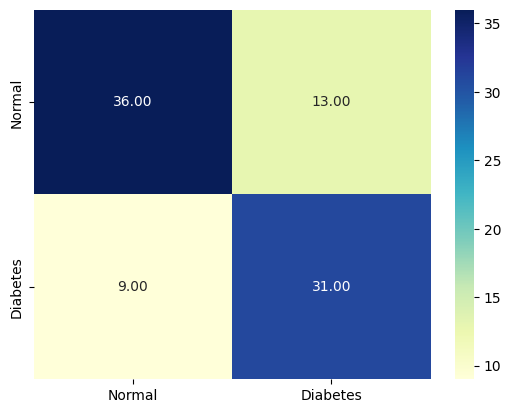

In [32]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score
import seaborn as sns

# 모델이 예측한 값 (클래스 1의 확률값)
predy = model.predict(X_test)

# 이진 분류 문제에서는 0.5를 기준으로 0과 1로 변환
predy = (predy > 0.5).astype(int)

# Confusion Matrix와 성능 지표 출력
LABELS = ['Normal', 'Diabetes']
cm = confusion_matrix(y_test, predy)
print(cm)
print(accuracy_score(y_test, predy))
print(f1_score(y_test, predy, average='weighted'))
print(classification_report(y_test, predy))

# Confusion Matrix 시각화
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='.2f')